In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
for i in range(3):
    print(i)

0
1
2


# 1. K-means

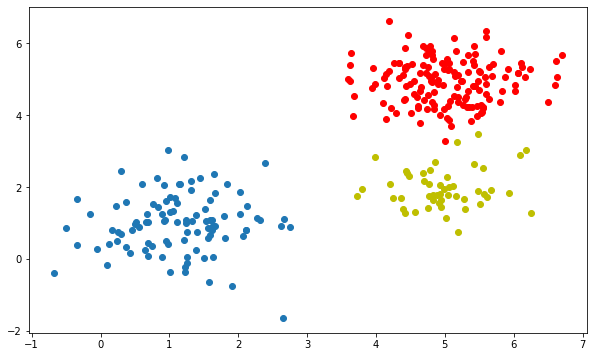

In [5]:
c1 = np.array([1,1])
c2 = np.array([5,5])
c3 = np.array([5,2])

x1 = np.random.randn(100,2)*0.8 + c1
x2 = np.random.randn(150,2)*0.6 + c2
x3 = np.random.randn(50,2)*0.5 + c3

fig, ax = plt.subplots(figsize = (10,6))
plt.scatter(x1[:,0], x1[:,1])
plt.scatter(x2[:,0], x2[:,1], c='r')
plt.scatter(x3[:,0], x3[:,1], c='y')

In [6]:
class my_k_means():
    
    def __init__(self, k):
        self.k = k
        self.logs = []

    def clustering(self, x, k_iter_max):
        n = x.shape[1]
        l = x.shape[0]
        self.a = np.zeros(l)
        self.c = np.zeros((self.k, n))
        for i in range(self.k): # генерация случайных c_k
            for j in range(n):                
                self.c[i,j] = min(x[:,j]) + (max(x[:,j])-min(x[:,j]))*np.random.rand()
        k_iter = 0
        while k_iter <= k_iter_max:
            self.logs.append(np.copy(self.c))
#             print(self.logs)
            for i in range(l):
                r = []
                for j in range(self.k):
                    r.append(self.dist(x[i,:], self.c[j,:]))  
                self.a[i] = r.index(min(r))
            for j in range(self.k):
                t = self.a == j
                self.c[j] = 1/len(self.a[t])*np.sum(x*t.astype('int')[:, np.newaxis],axis=0)
            k_iter += 1
#         return self.c

            
    def dist(self, x, c):
        return np.sum((c-x)**2)
        

In [7]:
x = np.vstack((x1,x2,x3))
cl = my_k_means(3)
cl.clustering(x, 10)

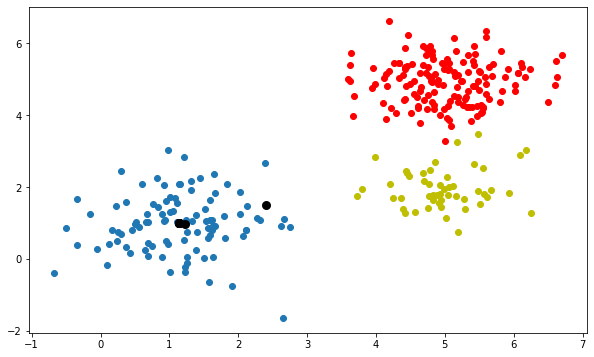

In [8]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x1[:,0], x1[:,1])
ax.scatter(x2[:,0], x2[:,1], c='r')
ax.scatter(x3[:,0], x3[:,1], c='y')

for log in cl.logs:
    ax.scatter(log[0,0], log[0,1], color='k', lw=3)

In [9]:
from sklearn.cluster import KMeans

[1]


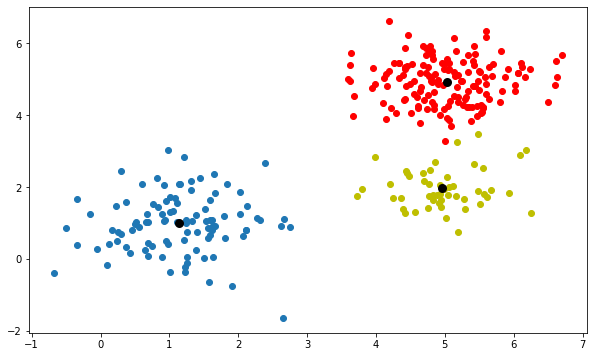

In [34]:
cl = KMeans(n_clusters=3, random_state=42).fit(x)


fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x1[:,0], x1[:,1])
ax.scatter(x2[:,0], x2[:,1], c='r')
ax.scatter(x3[:,0], x3[:,1], c='y')
ax.scatter(cl.cluster_centers_[:,0], cl.cluster_centers_[:,1], color='k', lw=3)
print(cl.predict(x[:1]))


# 2. DBSCAN

In [40]:
from sklearn.cluster import DBSCAN
from sklearn import cluster, datasets

Так можно задать любой формы датасет

(-4.753509936874388, 4.35611389666087, -5.4095153865061665, 8.35408336601655)

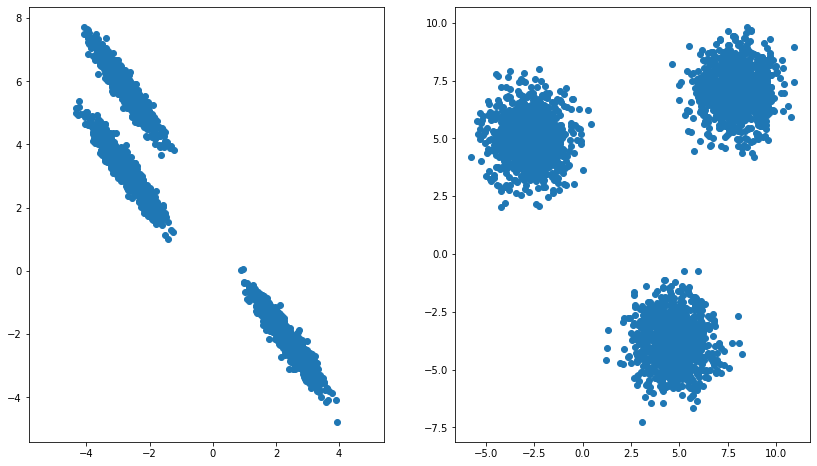

In [172]:
n_samples = 1500*2
random_state = None

X, y = datasets.make_blobs(centers=3, n_samples=n_samples, random_state=random_state)
phi = np.pi/6
transformation = [[0.1, 0.1 ], [-0.5, 0.7]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

fig, ax = plt.subplots(1,2, figsize=(14,8))
ax[0].scatter(X_aniso[:,0], X_aniso[:,1])
ax[1].scatter(X[:,0], X[:,1])
ax[0].axis('equal')

(-4.753509936874388, 4.35611389666087, -5.4095153865061665, 8.35408336601655)

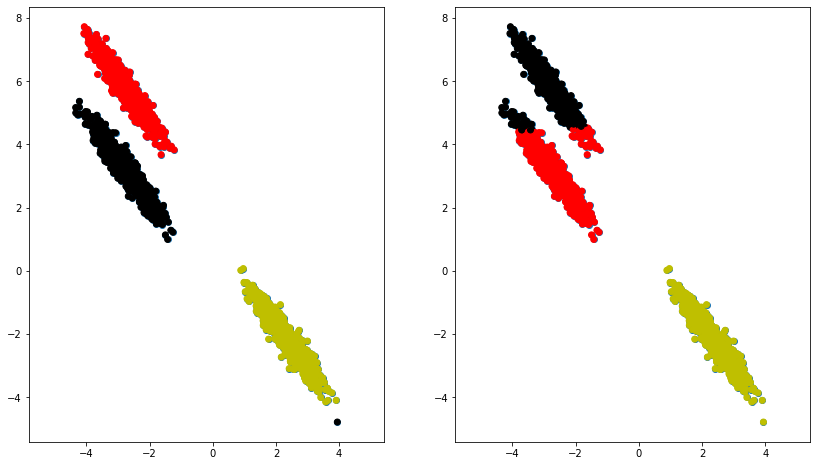

In [181]:
cl1 = KMeans(3).fit(X_aniso)
cl2 = DBSCAN(eps=0.5, min_samples=2).fit(X_aniso)

colors = ('y', 'r', 'k')

fig, ax = plt.subplots(1,2, figsize=(14,8))
ax[0].scatter(X_aniso[:,0], X_aniso[:,1])
ax[1].scatter(X_aniso[:,0], X_aniso[:,1])
ax[0].scatter(X_aniso[:,0], X_aniso[:,1], c=[colors[i] for i in cl2.labels_])
ax[1].scatter(X_aniso[:,0], X_aniso[:,1], c=[colors[i] for i in cl1.labels_])
ax[0].axis('equal')
ax[1].axis('equal')


# 3. t-SNE